# Calculating rice cell growth parameters

The purposes of this document is to walk through the calculations of growth paramaters $\mu_{max}$ and the starting inocculation density $m_0$ from the rice cell growth experiments.

In [37]:
import numpy as np #importing important packages 
import matplotlib.pyplot as pt
import scipy.stats as st 

In [1]:
#this is currently an incomplete dataset used only for the first 10 
days = [0,2,4,6,8]
all_data_F5 = np.array(
[[0.928571429,0.733333333,0.680272109],
[3.642384106,7.032258065,2.795031056],
[3.164556962,3.267973856,1.8]
[3.758389262,7.315436242,7.066666667],
[8.571428571,7.784431138,7.5]])

all_data_ln_F5 = np.log(all_data_F5)

lF5_average = np.transpose(np.average(all_data_ln_F5,axis=1))
lF5_std = np.transpose(np.std(all_data_ln_F5,axis=1))


NameError: name 'np' is not defined

In [2]:
#plot of data
pt.figure(1)
pt.plot(days,lF5_average)
pt.xlabel("days")
pt.ylabel("ln(g dw/L)")



NameError: name 'pt' is not defined

In [3]:
#now converting to d, G notation 
m = np.size(days) 
n = 2 #two model parameters 

#making G 
col1 = np.ones((m,1))
col2 = np.transpose(days)
G = np.matrix(np.column_stack((col1,col2)))

#defining d 
d = np.transpose(np.matrix(lF5_average))
#defining sigma for data 
sigma_d = lF5_std #s^2 != sigma^2 but we assume it does because what else?



NameError: name 'np' is not defined

using the formula $m = (G^{T}G)^{-1}G^Td$ that doesn't use the data's standard deviations 

In [4]:
#calculating m 
Gt = np.transpose(G)
m_unw = np.linalg.inv(Gt*G)*Gt*d
print(m_unw)

NameError: name 'np' is not defined

using the formulas $G_{w} = WG$, $d_{w}=Wd$ and $m = (G^T_wG_{w})^{-1}G_{w}^Td_{w}$

In [5]:
#calculating m taking into account std 
W = np.diag(1./sigma_d)
Gw = W*G
Gwt = np.transpose(Gw)
dw = W*d
m_w = np.linalg.inv(Gwt*Gw)*Gwt*dw
print(m_w)

[[-0.15508071]
 [ 0.27979772]]


Calculating the coviarance matrix for m $Cov(m_{L2}) = (G^T_wG_w)^{-1}G_w^TCov(d_w)G_w(G_w^TG_w)^{-1}$
we assume $Cov(d_w) = I_m $ since the data should be linearly independent measurements.

In [6]:
invGwtGw = np.linalg.inv(Gwt*Gw)
np.identity(m)
#cov_m = invGwtGw*Gwt*np.cov(dw)*Gw*invGwtGw
cov_m = invGwtGw*Gwt*np.identity(m)*Gw*invGwtGw
print(cov_m)

[[ 0.01550295 -0.00197703]
 [-0.00197703  0.00030011]]


$\mu$ is with a standard deviation of 

In [7]:
print("mu is = %0.3f +/- %0.4f" % (m_w[1,0],cov_m[1,1]))

mu is = 0.280 +/- 0.0003


In [10]:
#calculating the initial innoculation density 
M_0 = np.exp(m_w[0,0])
#M_0_std = np.exp(cov_m[0,0]) this doesn't work so we assume cov_[0,0] is percent error and then do this
#source for this idea https://people.duke.edu/~rnau/411log.htm
M_0_std = cov_m[0,0]*M_0 #this seems reasonable 
print("M_0 is %f +/- %f"%(M_0,M_0_std))

M_0 is 0.856346 +/- 0.013276


We use the following hypothosis testing framework $T_0 = \frac{| {{ \hat{\beta_1}-\beta_{1,0}| }}}{SE(\hat{\beta_1})}$ with the assumption that $SE(\hat{\beta_1}) = \sigma_{{\beta_1}}$ and $\beta_{1,0} = 0 $

In [93]:
#hypothosis testing prob that these things are real 
sigma_b = cov_m[0,0] #SE
sigma_mu = cov_m[1,1]
T0_mu = abs(m_w[1,0]-0)/sigma_mu #for slope 
T0_b = abs(m_w[0,0]-0)/sigma_b #for slope 
from scipy.stats import t

p_mu = (1 - t.cdf(T0_mu,df=m-n))*2
p_b = (1 - t.cdf(T0_b,df=m-n))*2 

print("p_mu is %.2E and p_b is %.2E" %(p_mu,p_b))



p_mu is 2.72E-09 and p_b is 2.13E-03


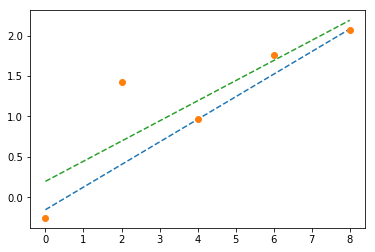

In [36]:
#plotting trendline and data
x_fake = np.linspace(0,8,32)
y_fake = x_fake*m_w[1,0] + m_w[0,0]
y_fake_un = x_fake*m_unw[1,0] + m_unw[0,0]
pt.figure(2)
pt.plot(x_fake,y_fake,'--')
pt.plot(days,lF5_average,'o')
pt.plot(x_fake,y_fake_un,'--')

In [51]:
#calculating P value 
r = (y_fake-d)
r_2norm = r*np.transpose(r)
print(st.chi2.cdf(r_2norm,m-1,loc=0,scale=1) )


[[1.         0.         0.99207663 0.         0.        ]
 [0.         0.99968057 0.99381867 0.99996646 0.99999615]
 [0.99207663 0.99381867 0.99339382 0.99411615 0.99438507]
 [0.         0.99996646 0.99411615 0.99999936 0.99999999]
 [0.         0.99999615 0.99438507 0.99999999 1.        ]]
